# Multiple Linear Regression

## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred=regressor.predict(X_test)

In [10]:
np.set_printoptions(precision=2)

In [11]:
a=y_pred.reshape(len(y_pred),1)
b=y_test.reshape(len(y_test),1)

In [12]:
np.concatenate((a,b),axis=1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

#Calculating the Accuracy

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282546

In [15]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 83502864.03256194


## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [16]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


## Getting the final linear regression equation with the values of the coefficients

In [17]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} + 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$



#Plotting the graphs

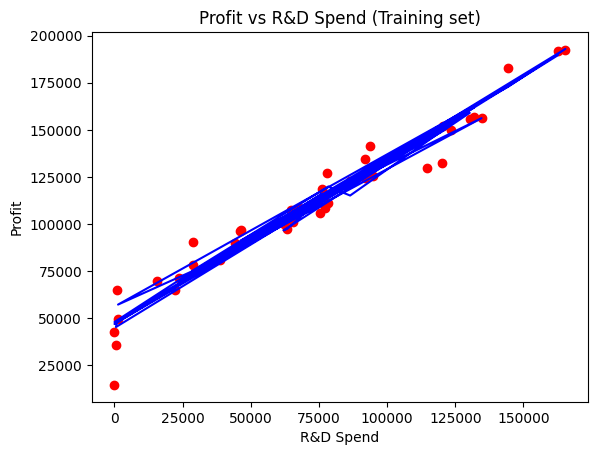

In [18]:
import matplotlib.pyplot as plt

# Plotting the training set results
plt.scatter(X_train[:, 3], y_train, color = 'red')
plt.plot(X_train[:, 3], regressor.predict(X_train), color = 'blue')
plt.title('Profit vs R&D Spend (Training set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

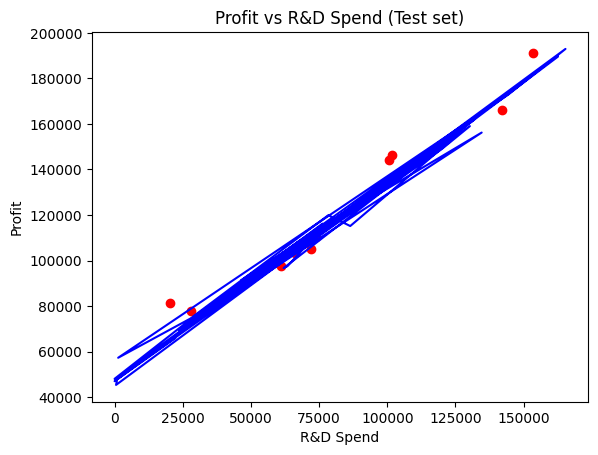

In [19]:
# Plotting the test set results
plt.scatter(X_test[:, 3], y_test, color = 'red')
plt.plot(X_train[:, 3], regressor.predict(X_train), color = 'blue')
plt.title('Profit vs R&D Spend (Test set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

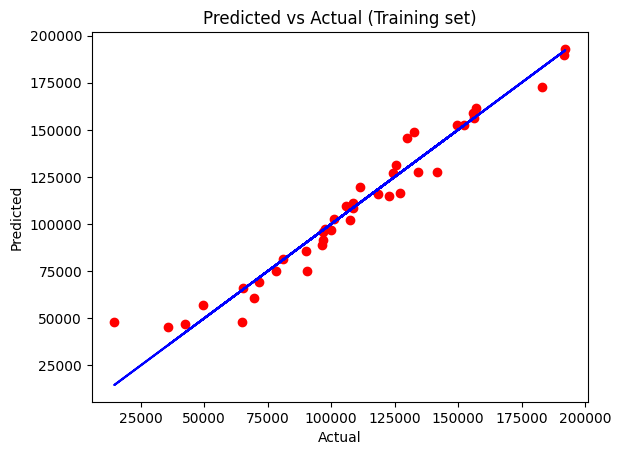

In [22]:
# Plotting the training set results
plt.scatter(y_train, regressor.predict(X_train), color = 'red')
plt.plot(y_train, y_train, color = 'blue')
plt.title('Predicted vs Actual (Training set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

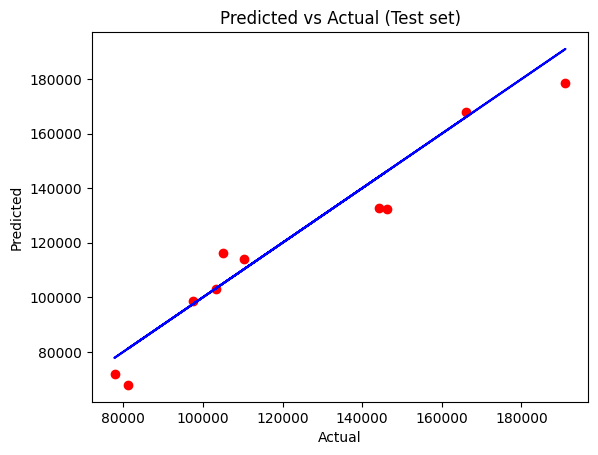

In [23]:
# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('Predicted vs Actual (Test set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()